### This notebook is to compute permutation entropy of a time series (Christoph Bandt and Bernd Pompe, 2001).  

Permutation entropy (PE) of a time series is obtained by  
$H(n) = - \Sigma p(\pi) log p(\pi)$  
where $\pi$ is the permutation of n data points. Compared to shannon entropy, PE is more suitable for noisy time series data.

In [1]:
import numpy as np
import math
import itertools
import operator
import matplotlib.pyplot as plt

In [2]:
'''
Input: 
----------
timeSeries: narray of shape (length,)
n: n-permutation
k: Interval

Output:
----------
H: Permution entropy
'''
def PE(timeSeries, n, k):
    states = np.zeros(math.factorial(n))
    pi = list(itertools.permutations(range(0,n),n))
    length = timeSeries.shape[0] - (n-1)*k
    for i in range(length):
        temp = []
        for j in range(n):
            temp.append(timeSeries[i + j*k])
        argsortedTemp = np.argsort(temp)
        for j in range(len(pi)):
            if operator.eq(list(pi[j]),list(argsortedTemp)):
                states[j] += 1
    p = states/length
    H = 0
    for i in range(p.shape[0]):
        if p[i] == 0:
            print('Exiting pattern with a 0 probabality')
            break
        H -= p[i]*math.log(p[i])
    # This is a regularization accroding to the paper
    H = H/(n-1)
    return H

Here is an example, ts1 is noise, ts2 is a sin wave. We can see that ts1 has a PE close to max value, while ts2 has a small PE.

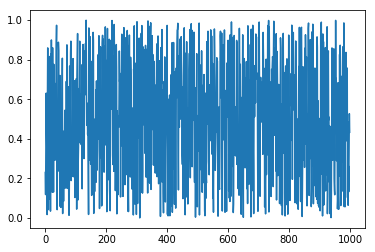

In [3]:
ts1 = np.random.rand(1000)
plt.plot(ts1)

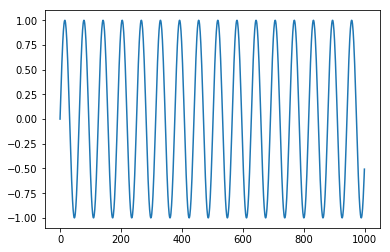

In [4]:
ts2 = np.sin(np.linspace(0,100,1000))
plt.plot(ts2)

In [5]:
PE(ts1 ,n=3,k=1)

0.8944903165103533

In [6]:
PE(ts2 ,n=3,k=1)

0.4285296085929363